In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = k
R = 10000
L = 10000

D = 1 

pi = np.pi

a = A/(pi*D)

In [3]:
print(pi*a**2*0.3/50)

7639.437268410976


## Solving for $f(t)$

In this Notebook we use the coupling condition to solve for $f(t)$. We therefore need to solve the following equation:

$$ks_x(0) = \kappa \zeta_r(a)$$

$$-\frac{k}{L}f(t)  + k \sum_{n=0}^{\infty} T_n(t) \phi_n'(0) = \kappa \frac{1-f(t)}{R-a} + \kappa \sum_{n=0}^{\infty} T_n(t) \phi_n'(a)$$

where $T_n(t)$ is given as before:

We define:
$$ \phi(x) = \begin{bmatrix}
\phi_1(x) \\
\phi_2(x) \\
\vdots \\
\phi_N(x) \\ 
\end{bmatrix} $$

$$ T(t) = \begin{bmatrix}
T_1(t) \\
T_2(t) \\
\vdots \\
T_N(t) \\ 
\end{bmatrix} $$

$$ e^{-\lambda t} = \begin{bmatrix}
e^{-\lambda_1 t} & 0 & \cdots & 0\\
0 & e^{-\lambda_2 t} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & e^{-\lambda_N t}\\ 
\end{bmatrix} $$

$$G = \begin{bmatrix}
<0,0> & <0,1> & \cdots & <0,N>\\
<1,0> & <1,1> & \cdots & <1,N>\\
\vdots & \vdots & \ddots & \vdots\\
<N,0> & <N,1> & \cdots & <N,N>\\ 
\end{bmatrix}$$
with $<n,m> = \int_0^L \phi_n(x) \phi_m(x) dx$ \\


$$ u_0 = \begin{bmatrix}
<u(x,0),1> \\
<u(x,0),2> \\
\vdots \\
<u(x,0),N> \\ 
\end{bmatrix} $$
with $<u(x,0),n> = \int_0^L u(x,0) \phi_n(x) dx$ \\


$$ q(t) = \int_0^L \begin{bmatrix}
L(x,t) & 0 & \cdots & 0\\
0 & L(x,t) & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & L(x,t)\\ 
\end{bmatrix}  \phi(x) dx$$
with $$ L(x,t) = -f'(t)\left(1-\frac{x}{L} \right) -  f(t)\frac{Q}{AL} $$

We can now write:
$$T(t) = e^{-\lambda t} \left( G^{-1} u_0 + \int_0^t e^{\lambda \tau} G^{-1} q(\tau) d\tau \right)$$

where
$$ \begin{aligned} & \int_0^t e^{\lambda \tau} G^{-1} q(\tau) d\tau \\
=& \int_0^t e^{\lambda \tau} G^{-1} \int_0^L \begin{bmatrix}
L(x,\tau) \phi_1(x)  \\
L(x,\tau) \phi_2(x) \\
\vdots \\
L(x,\tau) \phi_N(x) \\ 
\end{bmatrix}  dx d\tau \\
=& \int_0^L \int_0^t e^{\lambda \tau} G^{-1} \begin{bmatrix}
L(x,\tau) \phi_1(x)  \\
L(x,\tau) \phi_2(x) \\
\vdots \\
L(x,\tau) \phi_N(x) \\ 
\end{bmatrix} d\tau dx \\
=& \int_0^L \int_0^t e^{\lambda \tau} G^{-1} \left( -f'(\tau) (1-\frac{x}{L}) \phi(x) -f(\tau)\frac{Q}{AL} \phi(x) \right)d\tau dx \\
=& -\int_0^L \int_0^t e^{\lambda \tau} G^{-1} f'(\tau) (1-\frac{x}{L}) \phi(x) d\tau dx  
-\int_0^L \int_0^t e^{\lambda \tau} G^{-1} f(\tau)\frac{Q}{AL} \phi(x) d\tau dx \\ 
=& -\int_0^L G^{-1}\int_0^t e^{\lambda \tau} f'(\tau) d\tau (1-\frac{x}{L}) \phi(x)dx  
-\int_0^L G^{-1}\int_0^t e^{\lambda \tau} f(\tau) d\tau \frac{Q}{AL} \phi(x)dx \\ 
\end{aligned}$$

Now we use partial integration to remove $f'(\tau)$:
$$\begin{aligned} & \int_0^t e^{\lambda \tau} f'(\tau) d\tau \\
= & \left[ e^{\lambda \tau} f(\tau) \right]^t_0 - \int_0^t e^{\lambda \tau} \begin{bmatrix}
\lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \lambda_N\\ 
\end{bmatrix} f(\tau) d\tau
\end{aligned}$$

In [4]:
from scipy.special import jv
from scipy.special import yv
from scipy.optimize import root

### Finding eigenfunctions and -values

In [5]:
order = Q/(2*kappa*pi)
def phi_bessel(r,par):
    return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))


In [6]:
good_roots_bessel = np.array([[3.94030436e-05,7.61848195e-01], #n=0
                              [1.71476791e-04,1.36154281e+00], #n=1
                              [3.94842613e-04,2.49685017e+00], #n=2
                              [7.08883157e-04,6.97900847e+00], #n=3
                              [1.11333787e-03,-1.12220582e+01], #n=4
                              [1.60807412e-03,-3.06309775e+00], #n=5
                              [2.19302e-03,-1.67100131e+00], #n=6
                              [2.86812e-03,-1.05017646e+00], #n=7
                              [3.63335e-03,-0.66912985e+00], #n=8
                              [4.4887e-03,-0.38862351e+00], #n=9
                              [5.43415e-03,-0.15366476e+00], #n=10
                              [6.46968e-03,0.065137e+00], #n=11
                              [7.5953e-03,0.2897497e+00], #n=12
                              [8.81099e-03,0.54445193e+00], #n=13
                              [1.011676e-02,0.86784664e+00], #n=14
                              [1.15126e-02,1.34271697e+00], #n=15
                              [1.29985e-02,2.21252377e+00], #n=16
                              [1.457447e-02,4.71344792e+00], #n=17
                              [1.62405098e-02,-2.61426615e+02], #n=18
                              [1.799661e-02,-4.44488786e+00]]) #n=20


In [7]:
N_r = 19 #len(good_roots_bessel)
N_x = 30

def phi_r_n(r,n):
    return phi_bessel(r, good_roots_bessel[n-1])

def labda_r_n(n):
    return good_roots_bessel[n-1][0]

def phi_x_n(x,n):
    return np.exp(-Q/(2*k*A)*x)*np.sin(n*pi*x/L)

def labda_x_n(n):
    return (Q/A)**2/(4*k) + k*(n*pi/L)**2

def phi_x_prime(x,n):
    return n*pi/L

def phi_r_prime(r,n):
    alpha = order
    w = np.sqrt(good_roots_bessel[n-1][0]/kappa)
    d = good_roots_bessel[n-1][1]
    
    T1 = alpha*r**(alpha-1)*jv(alpha, w*r)
    T2 = r**(alpha)*0.5*w*jv(alpha-1, w*r)
    T3 = -r**(alpha)*0.5*w*jv(alpha+1, w*r)
    T4 = alpha*r**(alpha-1)*yv(alpha, w*r)
    T5 = r**(alpha)*0.5*w*yv(alpha-1, w*r)
    T6 = -r**(alpha)*0.5*w*yv(alpha+1, w*r)
    return (T1+T2+T3) + d*(T4+T5+T6)

In [10]:
def psi(r,t):
    return (f_interp(t)-1)/(a-R)*r + (R*f_interp(t)-a)/(R-a)

def xi(x,t):
    return f_interp(t)*(1-x/L)

def ss_x(x):
    s0 = (a/R)**(2*Q/(kappa*pi))
    v = -2*Q/(A*k)
    return s0/(1-np.exp(v*L))*np.exp(v*x) + s0 - s0/(1-np.exp(v*L))


def ss_r(r):
    #return (1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)*r + 1-R*(1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)
    return (r/R)**(2*Q/(kappa*pi))

def ssn_x(x):
    s0 = (a/R)**(Q/(kappa*pi))
    v = -Q/(A*k)
    return s0/(1-np.exp(v*L))*np.exp(v*x) + s0 - s0/(1-np.exp(v*L))

def ssn_r(r):
    #return (1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)*r + 1-R*(1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)
    return (r/R)**(Q/(kappa*pi))

def u(x):
    return ss_x(x) - xi(x,0)

def v(r):
    return ss_r(r) - psi(r,0)


In [11]:
def H(r,t):
    psi_t = f_prime_interp(t)*r/(a-R) + R*f_prime_interp(t)/(R-a)
    psi_rr = 0
    psi_r = (f_interp(t)-1)/(a-R)
    return np.diag((-psi_t + kappa*psi_rr + (kappa-Q/pi)/r*psi_r)*np.ones(N_r-1))

def Lf(x,t):
    xi_t = f_prime_interp(t)*(1-x/L)
    xi_xx = 0
    xi_x = -f_interp(t)/L
    return np.diag((-xi_t + k*xi_xx + Q/A*xi_x )*np.ones(N_x-1))

def inner_x(n,m):
    return integrate.quad(lambda x: phi_x_n(x,m)*phi_x_n(x,n), 0, L)[0]

def inner_r(n,m):
    return integrate.quad(lambda r: phi_r_n(r,m)*phi_r_n(r,n), a, R)[0]

G_x = np.array([[inner_x(n,m) for n in range(1,N_x)] for m in range(1,N_x)])
G_r = np.array([[inner_r(n,m) for n in range(1,N_r)] for m in range(1,N_r)])

labda_x = np.array([labda_x_n(n) for n in range(1,N_x)])
labda_r = np.array([labda_r_n(n) for n in range(1,N_r)])
lx = np.diag(labda_x)
lr = np.diag(labda_r)
def epx_lx(t):
    return np.diag(np.exp(-t*labda_x))
def epx_lr(t):
    return np.diag(np.exp(-t*labda_r))

inv_x = np.linalg.inv(G_x)
inv_r = np.linalg.inv(G_r)


def phix(x):
    return np.array([phi_x_n(x,n) for n in range(1,N_x)])

def phir(r):
    return np.array([phi_r_n(r,n) for n in range(1,N_r)])


def phix_prime(x):
    return np.array([phi_x_prime(x,n) for n in range(1,N_x)])

def phir_prime(r):
    return np.array([phi_r_prime(r,n) for n in range(1,N_r)])

# def T_x(t):
#     I = lambda tau: integrate.quad_vec(lambda x: Lf(x,tau) @ phix, 0,L)[0]
#     func = lambda tau: exp_lx @ inv_x @ I(tau)
#     return integrate.quad_vec(func, 0,t)[0]

## Another attempt: Galerkin-like approach

We assume $$f(t) = a_0 + \sum_{m=1}^M a_m e^{-\mu_m t}$$

In [12]:
N_x = 30
N_r = 18
N = 10

f0 = (a/R)**(2*Q/(kappa*pi))


I1 = np.array([integrate.quad(lambda x: (ss_x(x)-f0*(x/L))*phi_x_n(x, n), 0, L)[0] for n in range(1,N+1)]) ##
P1 = np.array([integrate.quad(lambda r: (ss_r(r)-((f0-1)/(a-R)*r + (R*f0-a)/(R-a)))*phi_r_n(r, n), a, R)[0] for n in range(1,N+1)])

I2 = np.array([integrate.quad(lambda x: (1-x/L)*phi_x_n(x, n), 0, L)[0] for n in range(1,N+1)])
P2 = np.array([integrate.quad(lambda r: (R-r)/(R-a)*phi_r_n(r, n), a, R)[0] for n in range(1,N+1)])

I3 = np.array([integrate.quad(lambda x: Q/(A*L)*phi_x_n(x, n), 0, L)[0] for n in range(1,N+1)])
P3 = np.array([integrate.quad(lambda r: (kappa-Q/pi)/r*phi_r_n(r, n), a, R)[0] for n in range(1,N+1)])

rho_x = np.array([integrate.quad(lambda x: phi_x_n(x, n)**2, 0, L)[0] for n in range(1,N+1)])
rho_r = np.array([integrate.quad(lambda r: phi_r_n(r, n)**2, a, R)[0] for n in range(1,N+1)])

tsteps = 10
dt = 1e-5
t = np.arange(0,(tsteps+0.1)*dt, dt)
#rint = np.zeros((tsteps, N+1))

def intgx(f_arr, fi, n):
    N = len(f_arr)
    if N == 1:
        return dt*(f_arr[0]+fi*np.exp(labda_x[n-1]*t[1]))/2
    temp = 0
    for i in range(1,N):
        temp += f_arr[i]*np.exp(labda_x[n-1]*t[i])
    return dt*(f_arr[0]/2 + temp + fi*np.exp(labda_x[n-1]*t[N])/2)

def intgr(f_arr, fi, n):
    N = len(f_arr)
    if N == 1:
        return dt*(f_arr[0]+fi*np.exp(labda_r[n-1]*t[1]))/2
    temp = 0
    for i in range(1,N):
        temp += f_arr[i]*np.exp(labda_r[n-1]*t[i])
    return dt*(f_arr[0]/2 + temp + fi*np.exp(labda_r[n-1]*t[N])/2)

def sr(f_arr, fi, ti):
    T1 = (fi-1)/(a-R)
    T3 = 0
    for n in range(1,N+1):
        T2 = 0
        for j in range(1,N+1):
            temp1 = P1[j-1]-f0*P2[j-1] + P3[j-1]/(labda_r[n-1]*(a-R))
            temp2 = fi*P2[j-1] - P3[j-1]/(labda_r[n-1]*(a-R))
            temp3 = intgr(f_arr, fi, n)          # DEF RINT + KEEP TRACK
            #rint[ti,n] = temp3 # UPDATE INTEGRAL TRACKER
            temp4 = temp3*np.exp(-labda_r[n-1]*ti)*(-labda_r[n-1]*P2[j-1] + P3[j-1]/(a-R))
            
            tot = temp1*np.exp(-labda_r[n-1]*ti) + temp2 + temp4
            T2 += inv_r[n-1,j-1] * tot
        T3 += T2*phir_prime(a)[n-1]
    return T1 + T3

def sx(f_arr, fi, ti):
    T1 = -fi/L
    T3 = 0
    for n in range(1,N+1):
        T2 = 0
        for j in range(1,N+1):
            temp1 = I1[j-1]+f0*I2[j-1]
            temp2 = fi*I2[j-1]
            temp3 = intgx(f_arr, fi, n)          # DEF RINT + KEEP TRACK
            #xint[ti,n] = temp3 # UPDATE INTEGRAL TRACKER
            temp4 = temp3*np.exp(-labda_x[n-1]*ti)*(labda_x[n-1]*I2[j-1] + I3[j-1])
            
            tot = temp1*np.exp(-labda_x[n-1]*ti) + temp2 + temp4
            T2 += inv_x[n-1,j-1] * tot
        T3 += T2*phix_prime(0)[n-1]
    return T1 + T3

def transport_x(f_arr, fi, ti):
    return -k*A*sx(f_arr, fi, ti)
def transport_r(f_arr, fi, ti):
    return kappa*pi*a*sr(f_arr, fi, ti)  

def func(f_arr, fi, ti):
    return transport_x(f_arr, fi, ti) - transport_r(f_arr, fi, ti)

/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


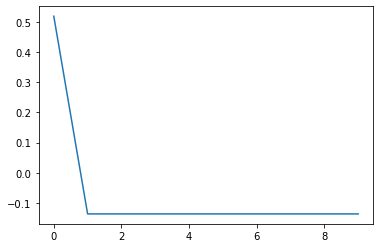

In [19]:

f_arr = [f0]
for i in range(1,tsteps):
    tof = lambda fi: func(f_arr, fi, t[i])
    #print(i)
    f_new = root(tof, x0=f_arr[-1]).x
    #print(f_new)
    f_arr.append(f_new)

plt.figure()
plt.plot(f_arr)
plt.show()

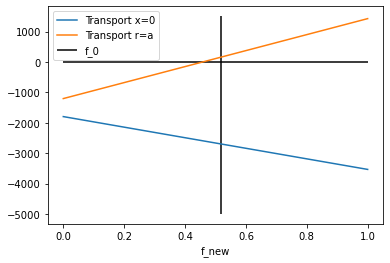

In [20]:
fi = np.linspace(0,1, 100)

T = 1e-5



plt.figure()
plt.plot(fi, transport_x([f0], fi, T), label='Transport x=0')
plt.plot(fi, transport_r([f0], fi, T), label='Transport r=a')
plt.vlines(f0, -5000, 1500, 'k')
plt.hlines(0, 0, 1, 'k', label='f_0')
plt.xlabel('f_new')
plt.legend()
plt.show()

Negatief transport is naar de rivier!  
Voor f_new > f0 wordt het transport door het r-vlak positief. Dit komt alleen niet overeen met de verwachting dat het nieuwe evenwicht zich hoger instelt...  
Voor f_new < f0 zijn beide transporten negatief wat altijd het geval zou moeten zijn
  
  
Je verwacht ander gedrag afhankelijk van de verstreken tijd -> Korte tijd kan transport door r-vlak inderdaad positief worden. Op lange termijn kan dat niet. 

In [23]:
print(labda_x[-1])

0.0332048648302646


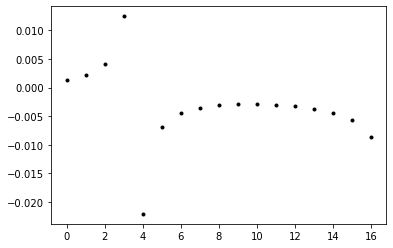

In [14]:
ar = phir_prime(a)

plt.figure()
plt.plot(ar, 'k.')
plt.show()
